#### 1. Regresja liniowa w R2:

- zaimportuj potrzebne bilbioteki

- ustaw ziarno losowe na 42

- zmień wielkość czcionki dla biblioteki seaborn na - 1.3

#### 2. Stwórz zbiór danych (data, target) z biblioteki sklearn z parametrami:

- n_samples=1000, n_features=1, n_targets=1, noise=15, random_state=42

- co oznaczają te parametry??

- zbadaj wstępnie dane - shape, corr itd.


#### 3. Regresja liniowa w sklearn:

- przygotuj dane - podziel na zbiór testowy(0.25) i treningowy (0.75)

- wyprintuj najważniejsze dane na temat wzorów

- zwizualizuj za pomocą matplotlib (z tłem z seaborn) zbiór test i train

- stwóz model regresji liniowej - sprawdź score, coef i intercept

- sprawdź score na modelu testowym - jaki jest wyniik ? jaki powinien być ? (czy mniejszy, czy większy)

- zwizualizuj zbiór testowy, treningowy, oba (z linią modelu regresji)



#### 4. Stwórz predykcję na podstawie modelu (sklearn):

- zbuduj df z y_true i y_pred i porównaj wyniki

- dołącz do df serię 'error'

- przeanalizuj dane np. za pomocą histogramu (pamiętaj o bins) i np.liniowego


#### 5. Spróbuj wykonać te wszystkie kroki dla 'równania normalnego' i 'metody spadku gradientu' i oczywiście ręczną predykcję 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

np.random.seed(42)

### 1. Przygotowanie danych

In [2]:
from sklearn.datasets import make_regression

In [3]:
data_sample, target_sample = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15, random_state=42)

In [4]:
data_numpy = np.c_[data_sample, target_sample]

data_numpy[:5]

array([[ -1.75873949, -34.42766754],
       [  1.03184454,  -3.3839128 ],
       [ -0.48760622, -22.81218402],
       [  0.18645431,  -7.54669436],
       [  0.72576662,  13.5802331 ]])

In [5]:
df_raw = pd.DataFrame(data_numpy, columns=['data', 'target'])
df = df_raw.copy()

In [6]:
df.head(5)

,data,target
0,-1.758739,-34.427668
1,1.031845,-3.383913
2,-0.487606,-22.812184
3,0.186454,-7.546694
4,0.725767,13.580233


### 2. Wstępna analiza danych

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    1000 non-null   float64
 1   target  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [8]:
df.isnull().sum()

data      0
target    0
dtype: int64

In [9]:
df.corr()

,data,target
data,1.000000,0.737629
target,0.737629,1.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
data,1000.0,0.019332,0.979216,-3.241267,-0.64759,0.025301,0.647944,3.852731
target,1000.0,0.388345,22.005193,-63.910421,-14.30009,0.881963,13.829938,69.022219


In [11]:
df.data.median()

0.025300612234888248

In [12]:
df.skew()

data      0.116976
target    0.082636
dtype: float64

<AxesSubplot:ylabel='Frequency'>

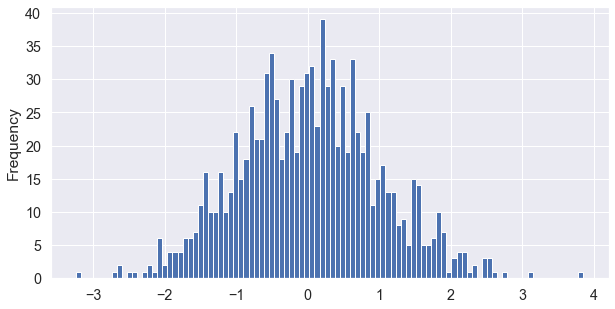

In [13]:
df.data.plot(kind='hist', bins=100, figsize = (10,5))

### 3. Podział zbiorów

In [14]:
data = df
target = df.pop('target')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print (f'data shape: {data.shape}')
print (f'target shape: {target.shape}\n')
print (f'X_train shape: {X_train.shape}')
print (f'X_test shape: {X_test.shape}')
print (f'y_train shape: {y_train.shape}')
print (f'y_test shape: {y_test.shape}\n')

print (f'X_train ratio: {len(X_train)/ len(data)}')
print (f'X_test ratio: {len(X_test)/ len(data)}')
print (f'y_train  ratio: {len(y_train)/ len(data)}')
print (f'y_test ratio: {len(y_test)/ len(data)}')

data shape: (1000, 1)
target shape: (1000,)

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_test shape: (250,)

X_train ratio: 0.75
X_test ratio: 0.25
y_train  ratio: 0.75
y_test ratio: 0.25


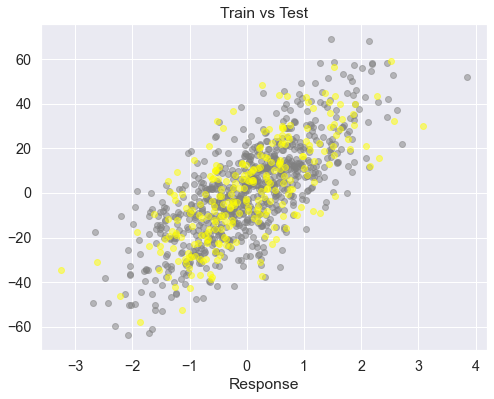

In [17]:
plt.figure (figsize=(8,6))
plt.title ('Train vs Test')
plt.xlabel('Predictor')
plt.xlabel('Response')
plt.scatter(X_train, y_train, color='grey', alpha=0.5)
plt.scatter(X_test, y_test, color='yellow', alpha=0.5);

### 4. Regression model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
print (f'Coef: {reg.coef_[0]:.4f}')
print (f'Intercept: {reg.intercept_}')

Coef: 16.7781
Intercept: 0.047775428476506565


In [21]:
reg.score(X_train, y_train)

0.5550440098049001

In [22]:
reg.score(X_test, y_test)

0.5108438585354155

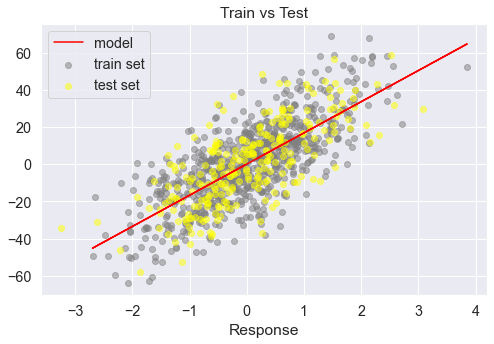

In [23]:
plt.figure (figsize=(8,5))
plt.title ('Train vs Test')
plt.xlabel('Predictor')
plt.xlabel('Response')
plt.scatter(X_train, y_train, color='grey', alpha=0.5, label = 'train set')
plt.scatter(X_test, y_test, color='yellow', alpha=0.5, label = 'test set');
plt.plot(X_train, reg.intercept_ + reg.coef_ * X_train, label = 'model', color='red')
plt.legend()

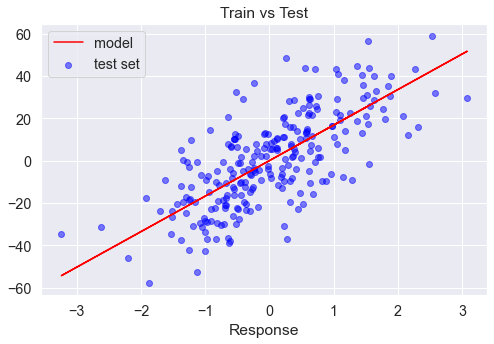

In [24]:
plt.figure (figsize=(8,5))
plt.title ('Train vs Test')
plt.xlabel('Predictor')
plt.xlabel('Response')
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label = 'test set');
plt.plot(X_test, reg.intercept_ + reg.coef_ * X_test, label = 'model', color='red')
plt.legend()

#### - predykcja

In [25]:
y_pred = reg.predict(X_test)

In [26]:
y_true = y_test.copy()

In [27]:
predictions = pd.DataFrame (data={'y_true': y_true, 'y_pred': y_pred, 'errors': y_true - y_pred})

In [28]:
predictions

,y_true,y_pred,errors
521,30.876983,25.601338,5.275646
737,1.850537,5.954600,-4.104063
740,30.604981,31.624589,-1.019608
660,-9.092543,-16.490844,7.398301
411,-36.311708,-10.800495,-25.511212
...,...,...,...
109,-23.004471,7.501674,-30.506145
430,-19.329526,5.485292,-24.814818
77,-8.955240,-2.098440,-6.856800
84,12.075009,36.174107,-24.099099


<AxesSubplot:ylabel='Frequency'>

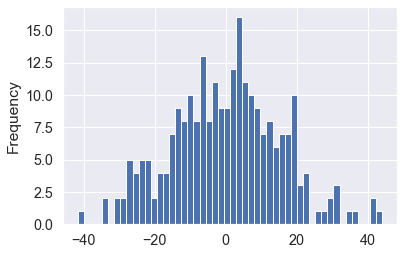

In [29]:
predictions['errors'].plot(kind='hist', bins=50)

In [30]:
from scipy import stats

In [31]:
predictions.apply(stats.normaltest)

,y_true,y_pred,errors
0,2.273262,2.467266,0.321534
1,0.320898,0.291233,0.851491


In [32]:
stats.normaltest(predictions)

NormaltestResult(statistic=array([2.27326184, 2.46726603, 0.32153376]), pvalue=array([0.32089833, 0.2912326 , 0.85149055]))

### 5. Statsmodel

In [33]:
import statsmodels.api as sm

In [34]:
X_train_np = X_train.values
X_train_np = sm.add_constant(X_train_np)

In [35]:
X_train_np

array([[ 1.        ,  0.17136828],
       [ 1.        ,  0.35701549],
       [ 1.        , -0.32206152],
       ...,
       [ 1.        , -0.68105166],
       [ 1.        ,  0.72167206],
       [ 1.        , -0.03498849]])

In [36]:
ols = sm.OLS(y_train, X_train_np).fit()

In [37]:
print (ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     933.1
Date:                Wed, 24 Nov 2021   Prob (F-statistic):          1.16e-133
Time:                        00:43:03   Log-Likelihood:                -3078.9
No. Observations:                 750   AIC:                             6162.
Df Residuals:                     748   BIC:                             6171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0478      0.537      0.089      0.9

### 6. Równanie normalne:

In [115]:
X1 =X_train.to_numpy()

In [116]:
y = y_train.to_numpy()
y = y.reshape((len(X1), 1))
y[:5]

array([[  5.55923929],
       [ 14.50600264],
       [-20.82408443],
       [ 13.70565689],
       [-20.21460463]])

In [117]:
X1[:5]

array([[ 0.17136828],
       [ 0.35701549],
       [-0.32206152],
       [ 0.68605146],
       [-1.33534436]])

In [118]:
bias = np.ones((len(X1),1))

In [119]:
X = np.append(bias, X1,axis=1)

In [120]:
L = np.linalg.inv(np.dot(X.T, X))

In [121]:
P = np.dot(X.T,y)

In [122]:
W= np.dot(L,P)
W

array([[ 0.04777543],
       [16.77810981]])

### 7. Spadek wzdłuż gradientu:

#### - przygotowanie danych

In [149]:
np.random.seed(42)

In [150]:
X1 = X_train.to_numpy()
Y = y_train.to_numpy()
m = len(X1)
Y = Y.reshape((m,1))

In [151]:
bias = np.ones((m,1))
X = np.append (bias, X1, axis=1)
len(X)

750

In [154]:
intercept =[]
coef = []
eta = 0.01
weights = np.random.randn(2,1)
weights

array([[0.64768854],
       [1.52302986]])

In [155]:
for i in range(10000):
    gradient = (2 / m) * X.T.dot(X.dot(weights) - Y)   # wzór 
    weights = weights - eta * gradient
    intercept.append(weights[0][0])
    coef.append(weights[1][0])

print(weights)

[[ 0.04777543]
 [16.77810981]]
